# Условие задачи

Рассмотрим пример системы уравнений, которая описывает изменения численности популяций двух видов и эволюцию некоего генетического признака α. Система ОДУ имеет вид:

$$\begin{equation*} 
    \begin{cases}
        \dot{x} = x(1 - 0.5x - \frac{2}{7\alpha^2} y), \\
        \dot{y} = y(2\alpha - 3,5\alpha^{2}x - 0.5y),\\
        \dot{\alpha} = \varepsilon(2 - 7\alpha x).
    \end{cases}
\end{equation*}$$

Параметры задачи таковы: $\varepsilon \le 0,01$, $0 \le x_0 \le 3$, $0 \le y_0 \le 15$, $0 < \alpha_0 \ll 1$, $T_k = 1500$. Наличие малого параметра в третьем уравнении системы показывает, что генетический признак меняется медленнее, чем численность популяций. Решение системы — релаксационные колебания.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Task conditions
epsilon = 0.0001
x_0     = 1.0
y_0     = 5.0
alpha_0 = 0.001
T_k     = 1500

def System(vec):
  x, y, alpha = vec
  dxdt = x * (1 - 0.5 * x - (2 / (7 * alpha**2)) * y)
  dydt = y * (2 * alpha - 3.5 * alpha**2 * x - 0.5 * y)
  dadt = epsilon * (2 - 7 * alpha * x)
  return np.array([dxdt, dydt, dadt])

# Якобиан системы
Якобиан этой системы будет иметь вид:
$$J = \begin{pmatrix} 1 - x - \frac{2}{7\alpha^2} y & -\frac{2}{7\alpha^2} x & -\frac{4}{7\alpha^3}xy \\ -3.5\alpha^2 y & 2\alpha - 3.5\alpha^2 x - 0.5y & -0.5y \\ -7\varepsilon x & 0 & 2\varepsilon - 7\varepsilon\alpha x \end{pmatrix}$$

In [2]:
def Jac(vec):
    x, y, alpha = vec
    J = np.array([
        [1 - x - (2 / (7 * alpha**2)) * y, (-2 / (7 * alpha**2)) * x, (-4 / (7 * alpha**3)) * x * y],
        [-3.5 * alpha**2 * y, 2 * alpha - 3.5 * alpha**2 * x - 0.5 * y, -0.5 * y],
        [-7 * epsilon * x, epsilon * (2 - 7 * alpha), -7 * epsilon * alpha * x]
    ])
    return J

# Решение системы методом Розенброка
Реализуем трёхстадийный метод Розенброка

In [3]:
# Rosenbrok method constants
p_1  = 0.435866
p_2  = 0.4782408
p_3  = 0.0858926
a    = p_1
b_21 = p_1
b_31 = p_1
b_32 = -2.1160533

def Dn(vec, h):
    return np.eye(3) + a * h * Jac(vec)

def Rosenbrok3Order(start_vec, h, n_of_steps):
    res = np.zeros((n_of_steps, np.shape(start_vec)[0]))
    res[0] = start_vec
    
    for n in range(0, n_of_steps - 1):
        D_n = Dn(res[n], h)
        k_1 = np.linalg.solve(D_n, h * System(res[n]))
        k_2 = np.linalg.solve(D_n, h * System(res[n] + b_21 * k_1))
        k_3 = np.linalg.solve(D_n, h * System(res[n] + b_31 * k_1 + b_32 * k_2))
        res[n + 1] = res[n] + p_1 * k_1 + p_2 * k_2 + p_3 * k_3
    return res

def showPlotRosenbrok(res, t):
  res = res.T
  plt.figure(figsize=[16, 10])
  plt.xlabel("t")
  plt.ylabel("x")
  plt.minorticks_on()
  plt.tight_layout()
  labels = ["x(t)", "y(t)", "a(t)"]
  for i in range(len(res)):
    plt.plot(t, res[i], label=labels[i])
  plt.legend(loc = 'best', fontsize = 12)
  plt.show()

# График

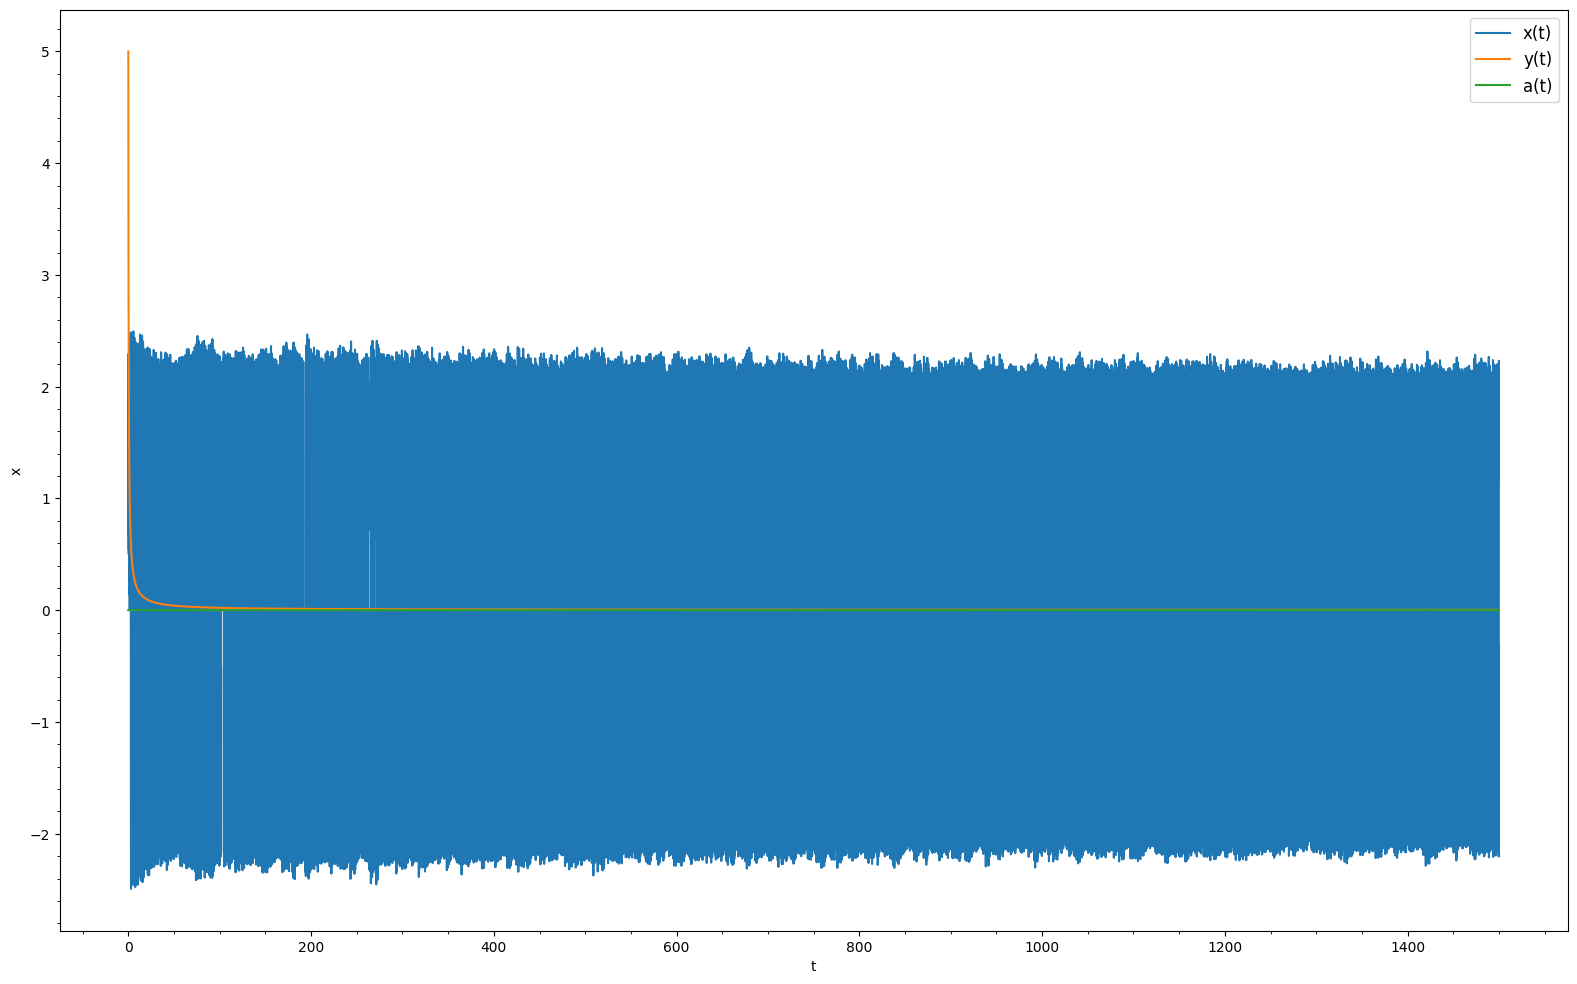

In [4]:
h = 0.05
n_of_steps = int(T_k / h) + 1
t = np.linspace(0, T_k, n_of_steps)

start_vec = np.array([x_0, y_0, alpha_0])
res = Rosenbrok3Order(start_vec, h, n_of_steps)
showPlotRosenbrok(res, t)